# Les automates

Les Automates permettent de modéliser de nombreuses situations.
Il s'agit :
- d'une notion mathématique abstraite ;
- d'une notion très concrète utilisée dans de nombreux appareils (rendu de monnaie, ascenseur, ...)


## La classe Automate
La classe Automate fournie permet de modéliser un Automate.

Par exemple, l'instruction suivante : 

In [2]:
from Automata import Automata

a = Automata(1, {2}, { 1 : {'a' : 2, 'b' : 1},
                      2 : {'a' : 1, 'b' : 2 } })

crée un automate à deux états. `1` est l'état initial et `2` est un état final.  
- en partant de `1` :
  + le symbole `a` permet de passer à `2`,
  + le symbole `b` laisse l'état inchangé;
- en partant de `2` :
  + le symbole `a` permet de passer à l'état `1` ,
  + le symbole `b` laisse l'état inchangé.
  
On peut obtenir une représentation de `a` (utiliser `a.show()` dans un interpréteur python autre que jupyter)

**nb** La bibiliothèque `graphviz` de python, ainsi que le programme `graphviz` sont nécessaires.

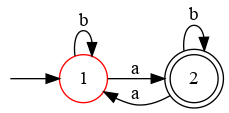

In [3]:
a

L'automate est actuellement dans l'état 1, indiqué en rouge. 

On modifie l'état de l'automate grace à la méthode `next`, en lui fournissant un symbole : 

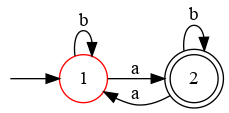

In [4]:
a.next('b')

Ici l'automate est resté dans l'état `1`, non final :

In [5]:
a.is_final()

False

Si on fournit à l'automate de caractère `a` :

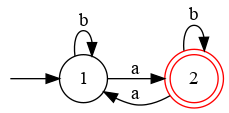

In [6]:
a.next('a')

Alors l'automate passe dans l'état 2, **état final** :

In [7]:
a.is_final()

True

On peut alors réinitialiser l'automate dans son état initial :

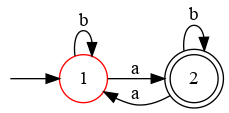

In [8]:
a.reset()
a

**Définition** : On dit qu'un mot est **reconnu** par l'automate, ou que l'automate **accepte** un mot si, en partant de l'état initial, et en fournissant à l'automate chaque lettre du mot, alors on arrive dans une état final.

Par exemple, l'automate reconnait le mot `ababba`, mais pas `babaaa` :

In [9]:
for mot in ("ababba", 'babaaa'):
    print(a.accept(mot))

True
False


En fait, cet automate **reconnaît les mots ayant un nombre impair de `a`**.

Pour créer des automates, on peut fournir les transitions à la création sous la forme d'un dictionnaire, ou alors ajouter des transitions à un automate existant :

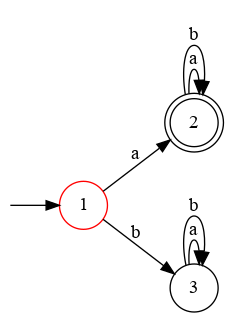

In [10]:
a[1]['b'] = 3
a[2]['a'] = 2
a[3]['a'] = 3
a[3]['b'] = 3
a

Cet automate reconnait les mots les mots commençant par un `a` :

In [11]:
for mot in [ 'abbabbab', 'baabba']:
    print(a.accept(mot))

True
False


## Quelques automates

**à faire**  
Créer un automate sur l'alphabet $\lbrace a, b\rbrace$, permettant de reconnaitre le mot `baba`

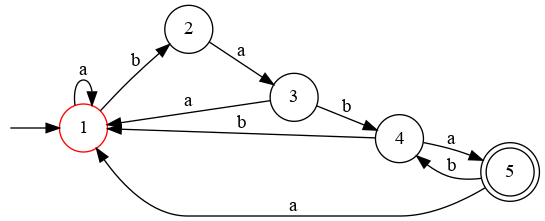

In [13]:
a = Automata(1, {5})
a[1]['b'] = 2
a[1]['a'] = 1
a[2]['a'] = 3
a[2]['b'] = 2
a[3]['b'] = 4
a[3]['a'] = 1
a[4]['a'] = 5
a[4]['b'] = 2
a[5]['b'] = 4
a[5]['a'] = 1
a

## Utiliser un automate pour chercher un mot dans un texte

Puisque les automates permettent d'adapter leur état en fonction des entrées lues précédemment,  
il est possible de les utiliser pour rechercher des mots dans un texte.  

Étant donné un automate $\mathcal A$, l'algorithme suivant permet de déterminer  
si le motif reconnu par $\mathcal A$ est présent dans le texte :

**Entrées :** un automate $\mathcal A$, un texte `texte`  
**Sortie :** Vrai si le motif reconnu par $\mathcal A$ est présent dans `texte`, Faux sinon  
1. $i \leftarrow 0 $ 
2. $n \leftarrow longueur(texte)$
3. **Tant que** $i < n$ et $\mathcal A$ n'est pas dans un état final **faire**
4. $\quad$ fournit à $\mathcal A$ le caractère `texte`$[i]$
5. $\quad$ $i \leftarrow i + 1$
6. **Fin tant que**
7. **Renvoyer** $\mathcal A$ est dans l'état final

**à faire**

1. Créer un automate qui reconnait le motif `chercher`
2. Écrire une fonction `automata_search` implantant l'algorihme précédent en python.
3. Utiliser votre fonction pour rechercher le motif `chercher` dans les misérables.

In [14]:
def automata_search(automata, texte):
    """
    :param automata: (Automata) un automate
    :param texte: (String) un texte
    :return: True si le motif reconnu par l'automate est présent dans le texte, False sinon
    """
    pass

## Retour sur KMP

Dans l'algorithme de Knuth, Morris et Pratt, la fonction `decalages_bords` permet de déterminer des décalages du motif à effectuer lorsque la comparaison d'un caractère du motif et du texte ne correspondent pas.

In [17]:
def decalages_bords(motif):
    """
    :param motif: (str) un motif
    :return: (list of int) La liste des décalages possibles
    :Exemple:
    
    >>> decalages_bords("abbaba")
    [-1, 0, 0, -1, 0, 2, 1]
    """
    m = len(motif)
    pi = [ -1 ]
    k = -1
    for q in range(m):
        while k > -1 and motif[k] != motif[q]:
            k = pi[k]
        k = k+1
        if q+1 < m and motif[k] == motif[q+1]:
            pi.append(pi[k])
        else:
            pi.append(k)
    return pi

In [18]:
decalages_bords('abbaba')

[-1, 0, 0, -1, 0, 2, 1]

En fait, on peut voir l'algorithme KMP comme une sorte d'automate,
à condition d'autoriser certaines transitions permettant de passer
d'un état à l'autre sans lire de mot.

Ce type d'automate est appelé **automate non déterministe** et peut ensuite être déterminisé (rendu déterministe), aboutissant à un automate reconnaissant le motif, basé sur KMP.

Par manque de temps, nous allons présenter une autre méthode que celle consistant à déterminiser l'automate.
Il s'agit d'introduire de nouvelles transitions dans l'automate.

Supposons que l'automate suivant se trouve dans l'état `5` (on a reconnu `abbab`)


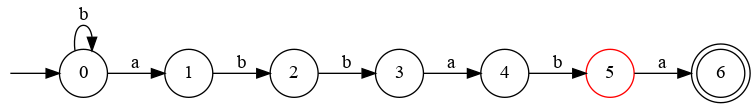

In [19]:
a = Automata(0, {6})
a[0]['a'] = 1
a[0]['b'] = 0
a[1]['b'] = 2
a[2]['b'] = 3
a[3]['a'] = 4
a[4]['b'] = 5
a[5]['a'] = 6
a.next('a').next('b').next('b').next('a').next('b')

Si le caractère fourni $c$ n'est pas un `a`, alors on veut pouvoir faire passer l'automate dans l'état `2` afin de conserver le bénéfice de la lecture des symboles `ab`. La lecture reprend alors **avec le symbole $c$ à partir de `2`**.

Ceci est programmé dans la classe `Automata` à l'aide de transitions spéciales de la forme `!=a`, indiquant l'état dans lequel la lecture reprend si le caractère fourni est différent de `a`.

Par exemple :

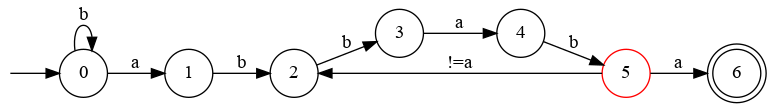

In [20]:
a[5]['!=a'] = 2
a

En complétant, on obtient un automate permettant de reconnaitre
le motif `ababa` en tenant compte des bords du motif. Lorsqu'un bord n'existe pas, on retourne dans l'état initial (on ne fait donc pas la différence entre un bord vide et un bord qui n'existe pas) :

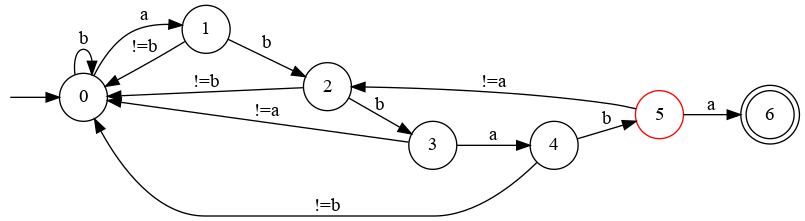

In [21]:
a[3]['!=a']=0
a[4]['!=b']=0
a[2]['!=b']=0
a[1]['!=b']=0
a

Ainsi, lire un `b` depuis l'état `5` nous amène d'abord à l'état `2` puis, de celui-ci, on atteint l'atteint `3` en lisant la lettre `b`.

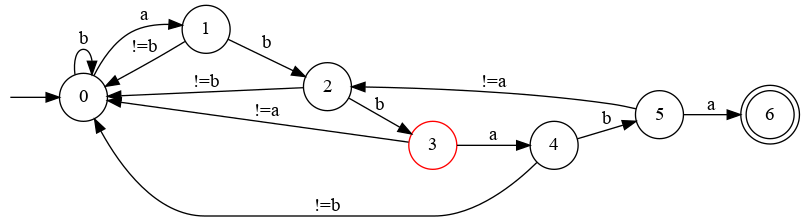

In [22]:
a.next('b')

Il est également possible d'utiliser, dans les transitions, le symbole `*` signifiant *tout symbole*.
Il permet de faire passer l'automate d'un état dans un autre à la lecture de n'importe quel caractère.

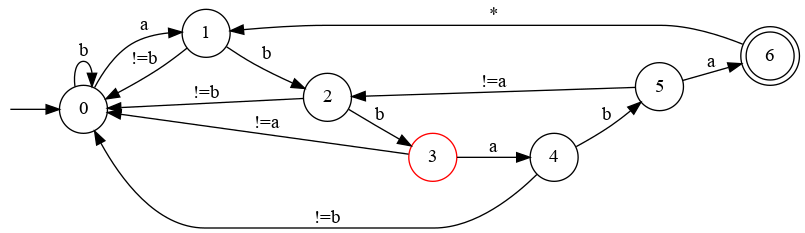

In [23]:
a[6]['*'] = 1
a

Cet automate permet de reconnaitre le mot `abbaba`. Notons que nous avons créé une transition de l'état final vers l'état `1` car le mot complet possède un bord de longueur 1 (la dernière valeur de la liste renvoyée par la fonction `decalages_bords`).
 
On souhaite automatiser la création de cet automate.  
La fonction `decalages_bords` nous fournit un moyen pratique de le construire : son résultat indique en effet **l'état dans lequel aller en cas de non correspondance**.

**à faire**  
Écrire une fonction `kmp_automate(motif)` qui prend en paramètre un motif, et qui construit un automate capable d'illustrer le fonctionnement de KMP.

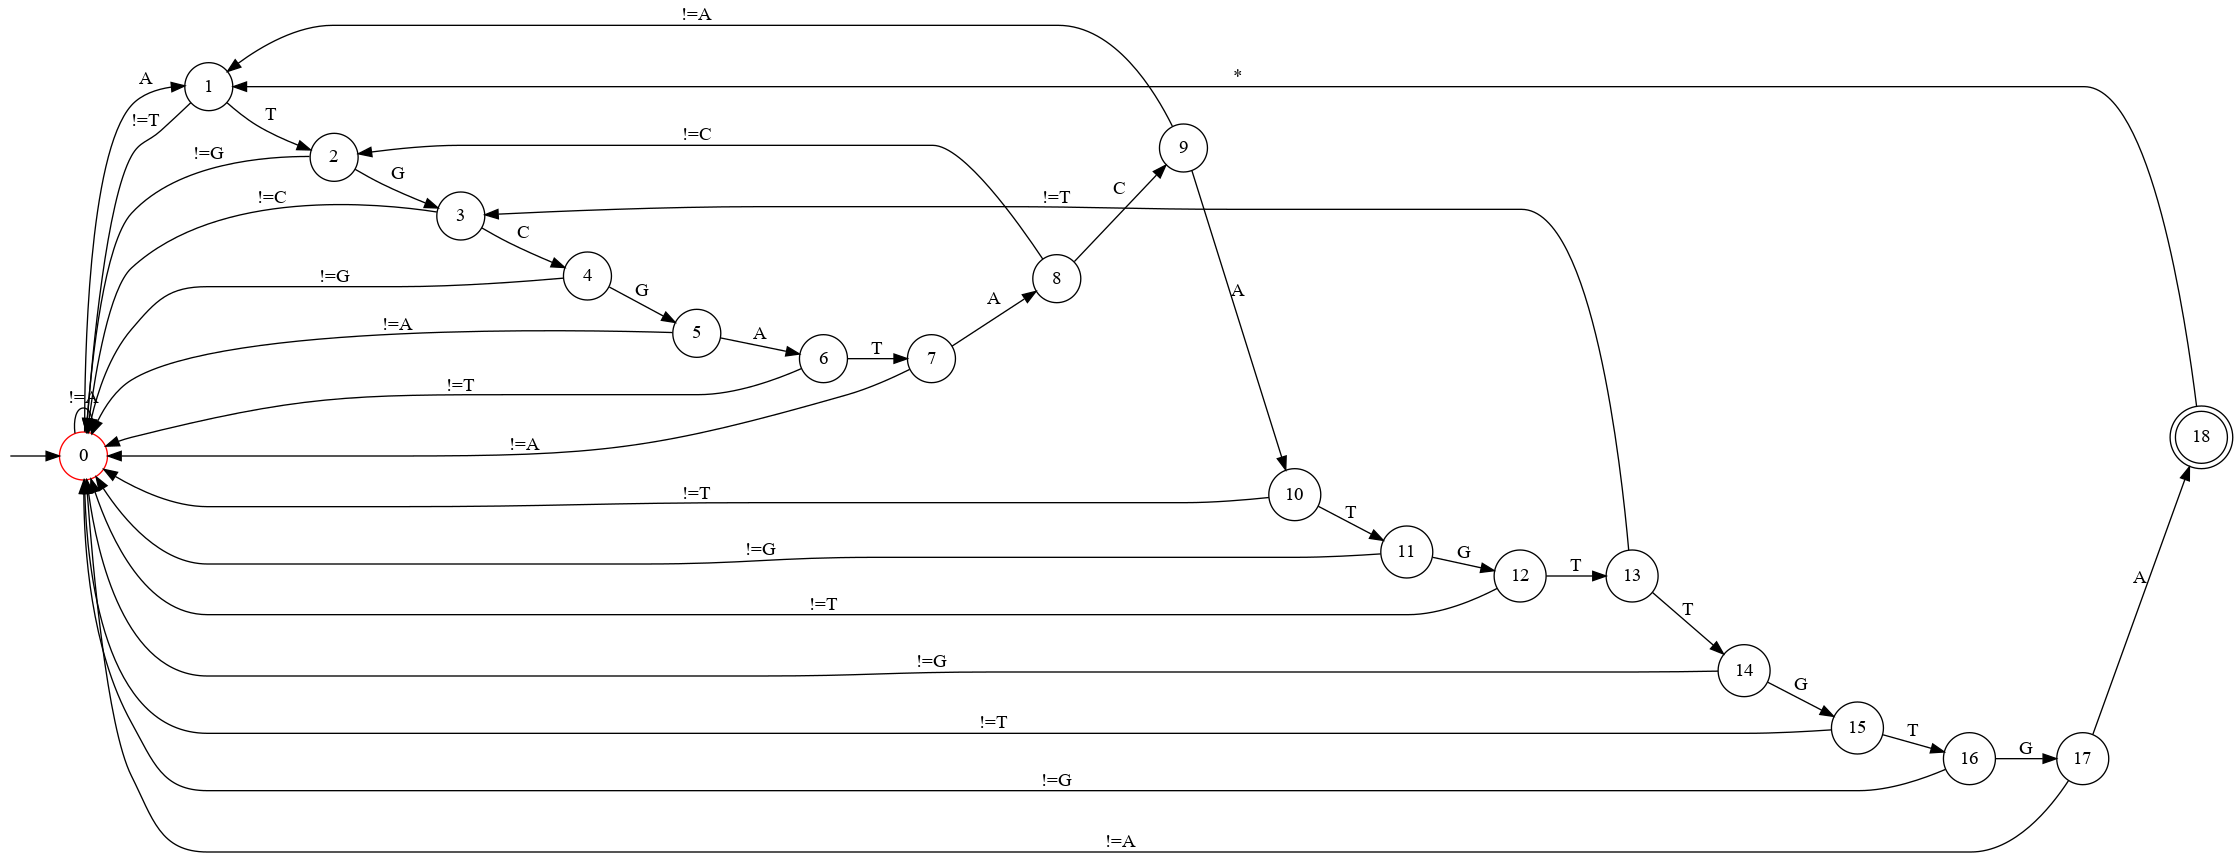

In [24]:
def kmp_automate(motif):
    pass

kmp_automate('ATGCGATACATGTTGTGA')